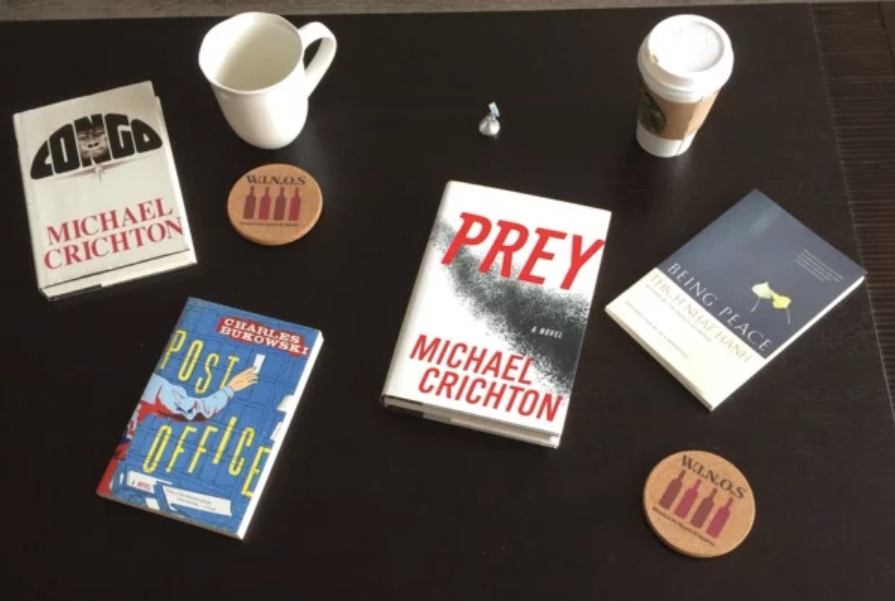

In [1]:
from IPython.display import Image
import cv2

image = cv2.imread("example.png")
Image("example.png")

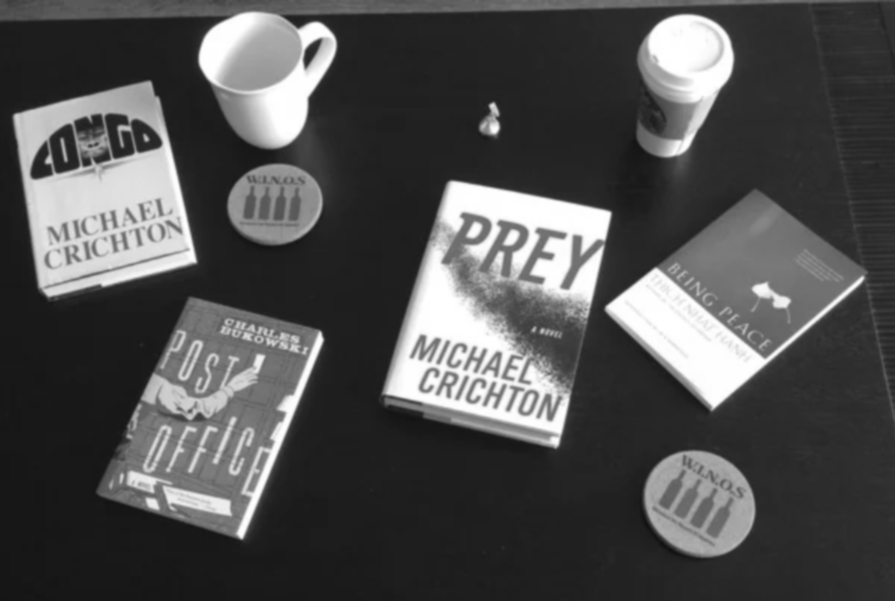

In [2]:
#преобразование гаммы в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
cv2.imwrite("gray.png", gray)
Image("gray.png")

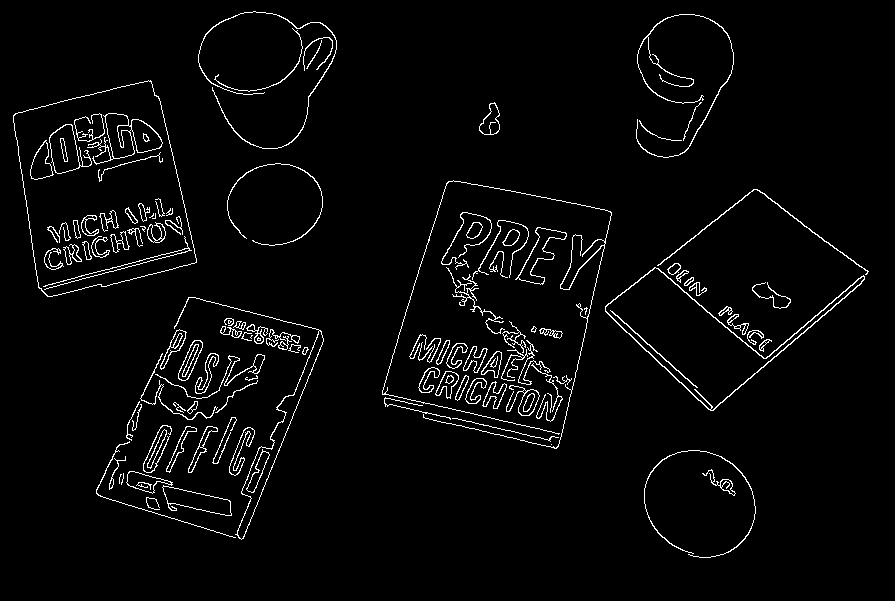

In [3]:
# распознавание контуров
edged = cv2.Canny(gray, 10, 250)
cv2.imwrite("edged.png", edged)
Image("edged.png")

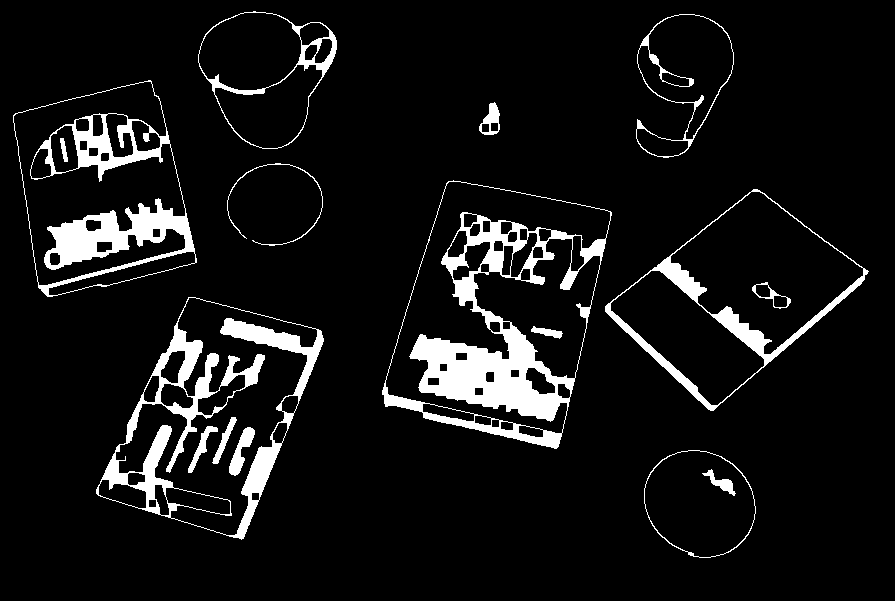

In [4]:
#закрытие
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2.imwrite("closed.png", closed)
Image("closed.png")

In [5]:
#контуры в изображении
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]

In [6]:
total = 0
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1

In [7]:
print("Найдено {0} книги на этой картинке".format(total))
cv2.imwrite("output.png", image)

Найдено 4 книги на этой картинке


True

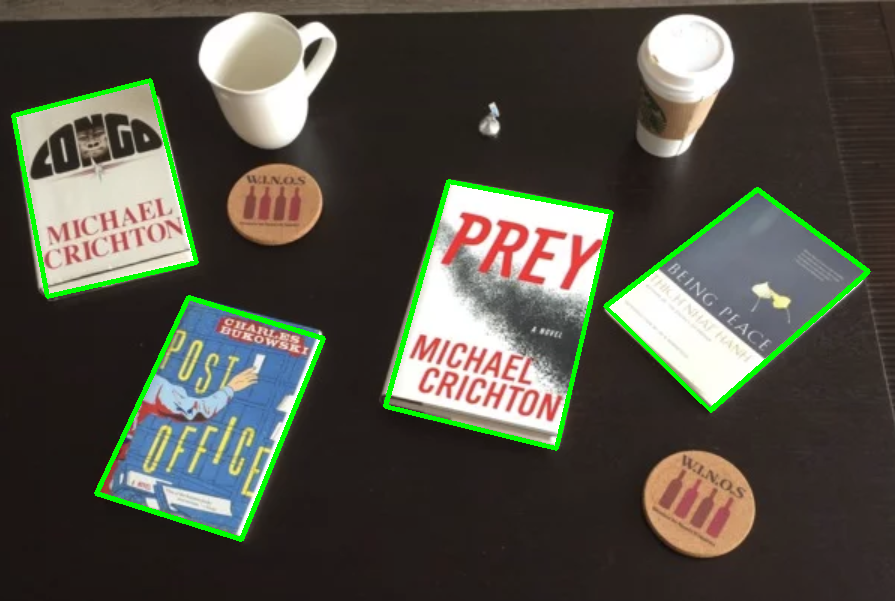

In [8]:
Image("output.png")